In [1]:
import json

users = ["minh", "xiwen", "jingyu"]

with open("./data/original/bookstack.json", "r") as f:
    bookstack_data = json.load(f)

with open("./data/original/indico.json", "r") as f:
    indico_data = json.load(f)

with open("./data/original/invoiceninja.json", "r") as f:
    invoiceninja_data = json.load(f)

with open("./data/original/prestashop.json", "r") as f:
    prestashop_data = json.load(f)

print(
    len(bookstack_data), len(indico_data), len(invoiceninja_data), len(prestashop_data)
)
print(
    sum(
        [
            len(bookstack_data),
            len(indico_data),
            len(invoiceninja_data),
            len(prestashop_data),
        ]
    )
)

436 549 182 1884
3051


Unique IDs: 2628
Total records: 2628
Records with commit_id: 387
['https://github.com/PrestaShop/PrestaShop/issues/38456', 'https://github.com/PrestaShop/PrestaShop/issues/38448', 'https://github.com/PrestaShop/PrestaShop/issues/38122', 'https://github.com/PrestaShop/PrestaShop/issues/37652', 'https://github.com/PrestaShop/PrestaShop/issues/37532', 'https://github.com/PrestaShop/PrestaShop/issues/37320', 'https://github.com/PrestaShop/PrestaShop/issues/36401', 'https://github.com/PrestaShop/PrestaShop/issues/36097', 'https://github.com/PrestaShop/PrestaShop/issues/36012', 'https://github.com/PrestaShop/PrestaShop/issues/36010']


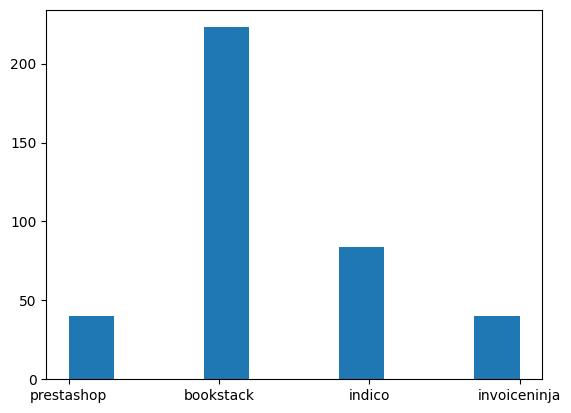

In [3]:
import json
from matplotlib import pyplot as plt

with open("./data/original/events.json", "r") as f:
    all_events = json.load(f)

ids = set(map(lambda x: x["id"], all_events))
print("Unique IDs:", len(ids))
print("Total records:", len(all_events))

with_commits = []
for row in all_events:
    events = row.get("events", [])
    if not events:
        continue

    if any([x for x in events if x.get("commit_id", "")]):
        with_commits.append(row["id"])

print("Records with commit_id:", len(with_commits))
print(with_commits[:10])


def extract_app_from_url(url: str) -> str:
    url = url.lower()
    if "bookstack" in url:
        return "bookstack"
    elif "indico" in url:
        return "indico"
    elif "invoiceninja" in url:
        return "invoiceninja"
    elif "prestashop" in url:
        return "prestashop"
    else:
        return "unknown"


plt.hist([extract_app_from_url(x) for x in with_commits], label="With commits");

In [4]:
import os
import numpy as np

# Each user gets roughly equal number of data points across apps
np.random.seed(42)

# The issues should be shuffled for randomness
np.random.shuffle(prestashop_data)
np.random.shuffle(bookstack_data)
np.random.shuffle(indico_data)
np.random.shuffle(invoiceninja_data)

print(
    f"Before removing commits: {len(prestashop_data)}, {len(bookstack_data)}, {len(indico_data)}, {len(invoiceninja_data)}"
)
prestashop_data = [x for x in prestashop_data if (x["html_url"] in with_commits or "pull" in x["html_url"])]
bookstack_data = [x for x in bookstack_data if (x["html_url"] in with_commits or "pull" in x["html_url"])]
indico_data = [x for x in indico_data if (x["html_url"] in with_commits or "pull" in x["html_url"])]
invoiceninja_data = [x for x in invoiceninja_data if (x["html_url"] in with_commits or "pull" in x["html_url"])]
print(
    f"After removing commits: {len(prestashop_data)}, {len(bookstack_data)}, {len(indico_data)}, {len(invoiceninja_data)}"
)

Before removing commits: 1884, 436, 549, 182
After removing commits: 445, 237, 86, 42


In [7]:
prestashop_splits = np.array_split(prestashop_data, len(users))
bookstack_splits = np.array_split(bookstack_data, len(users))
indico_splits = np.array_split(indico_data, len(users))
invoiceninja_splits = np.array_split(invoiceninja_data, len(users))

data = {
    "minh": {
        "prestashop": prestashop_splits[0].tolist(),
        "bookstack": bookstack_splits[0].tolist(),
        "indico": indico_splits[0].tolist(),
        "invoiceninja": invoiceninja_splits[0].tolist(),
    },
    "xiwen": {
        "prestashop": prestashop_splits[1].tolist(),
        "bookstack": bookstack_splits[1].tolist(),
        "indico": indico_splits[1].tolist(),
        "invoiceninja": invoiceninja_splits[1].tolist(),
    },
    "jingyu": {
        "prestashop": prestashop_splits[2].tolist(),
        "bookstack": bookstack_splits[2].tolist(),
        "indico": indico_splits[2].tolist(),
        "invoiceninja": invoiceninja_splits[2].tolist(),
    },
}


def check_data(u: str):
    print(u)
    print(len(data[u]["prestashop"]))
    print(len(data[u]["bookstack"]))
    print(len(data[u]["indico"]))
    print(len(data[u]["invoiceninja"]))


check_data("minh")
check_data("xiwen")
check_data("jingyu")

for user in users:
    dir_name = f"./data/splits/{user}"
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

    with open(f"{dir_name}/prestashop.json", "w") as f:
        json.dump(data[user]["prestashop"], f, indent=4)
    with open(f"{dir_name}/bookstack.json", "w") as f:
        json.dump(data[user]["bookstack"], f, indent=4)
    with open(f"{dir_name}/indico.json", "w") as f:
        json.dump(data[user]["indico"], f, indent=4)
    with open(f"{dir_name}/invoiceninja.json", "w") as f:
        json.dump(data[user]["invoiceninja"], f, indent=4)

minh
149
79
29
14
xiwen
148
79
29
14
jingyu
148
79
28
14


In [6]:
# Concat the data and check unique ids
all_data = []
for user in users:
    all_data += data[user]["prestashop"]
    all_data += data[user]["bookstack"]
    all_data += data[user]["indico"]
    all_data += data[user]["invoiceninja"]
print(len(all_data))
all_ids = [d["id"] for d in all_data]
print(len(set(all_ids)))

810
810
